#### Case Study 03: Machine Learning

Segmentasi pasar adalah proses membagi pasar menjadi kelompok-kelompok yang lebih kecil dan terdefinisi dengan jelas, yang memiliki karakteristik dan kebutuhan yang serupa. Tujuan utamanya adalah untuk memahami lebih baik kebutuhan dan preferensi konsumen, sehingga perusahaan dapat menyesuaikan strategi pemasaran mereka untuk melayani setiap segmen pasar dengan lebih efektif.

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [76]:
df = pd.read_csv("Customer Data.csv")

In [77]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [79]:
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

##### EDA

In [83]:
df.shape

(8950, 18)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [86]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [88]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

##### mengisi nilai rata - rata yang hilang dalam kumpulan data

In [91]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### memeriksa baris duplikat dalam kumpulan data

In [95]:
df.duplicated().sum()

0

##### menhapus kolom CUST_ID karena tidak digunakan

In [97]:
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [99]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

##### membaca semua kolom

In [103]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

##### Visualisasi Data

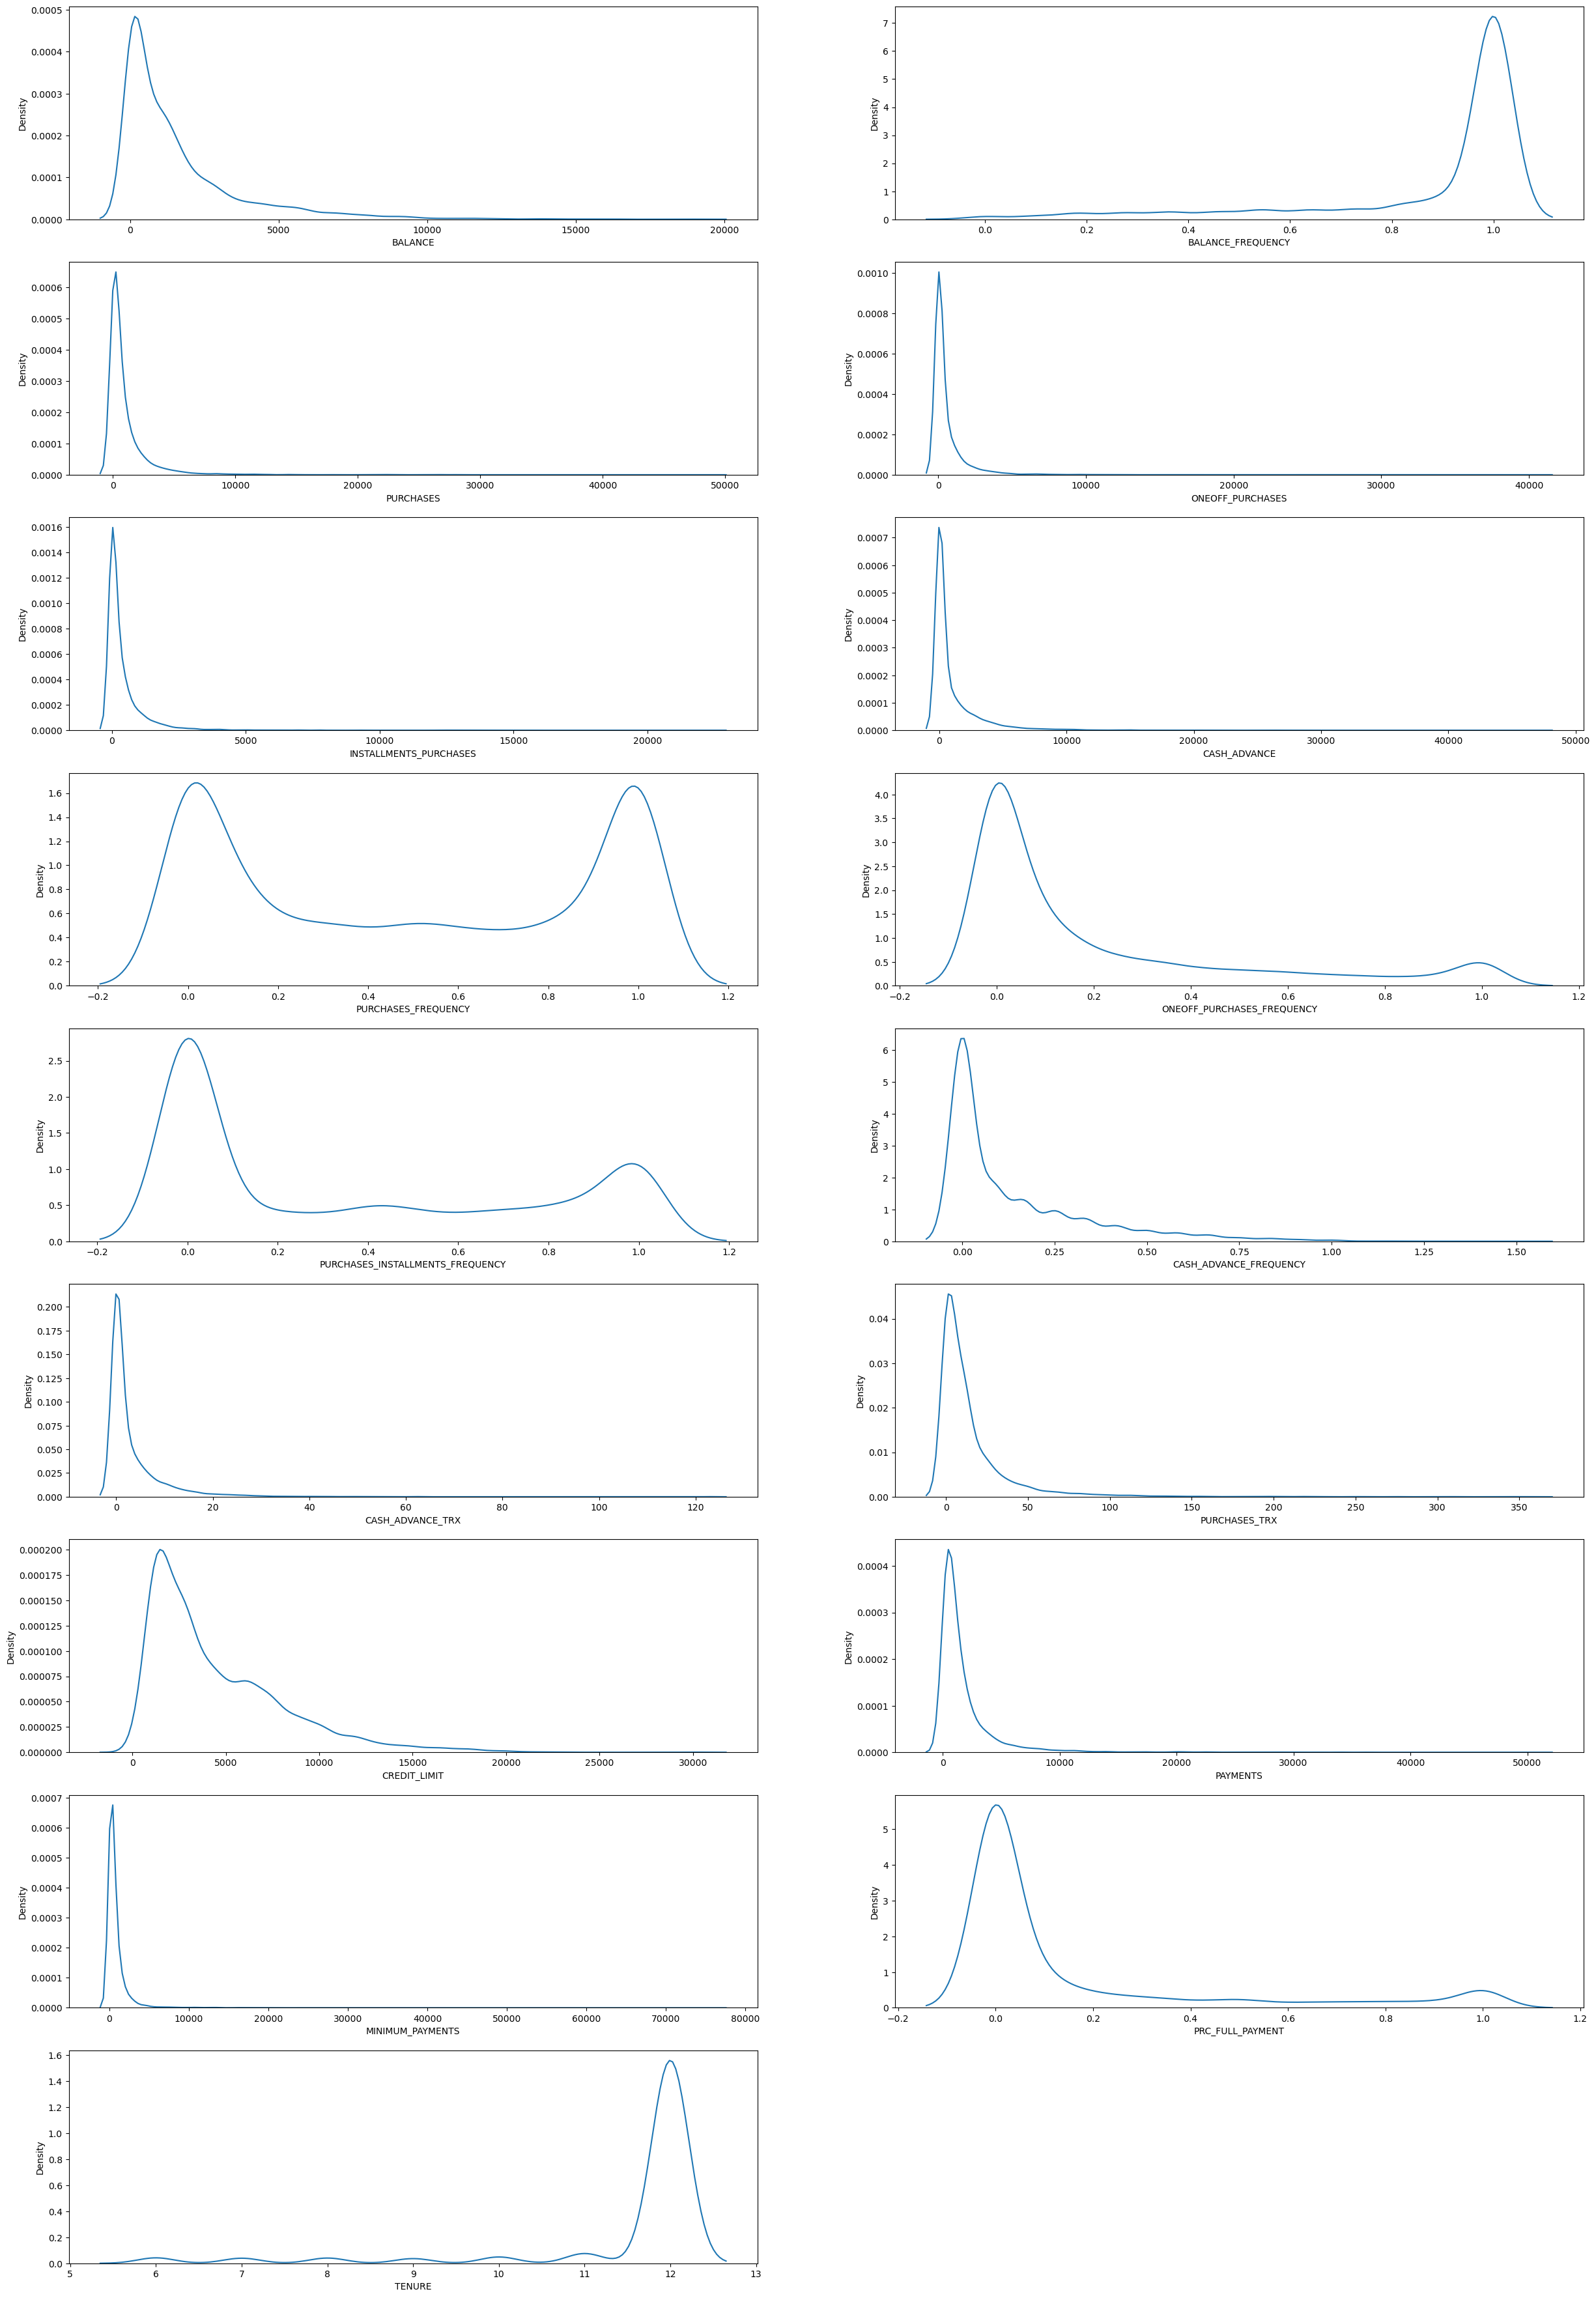

In [107]:
plt.figure(figsize = (30, 45))
for i, col in enumerate (df.columns):
    if df[col].dtype != "object":
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot (df[col], ax=ax)
        plt.xlabel(col)

plt.show()

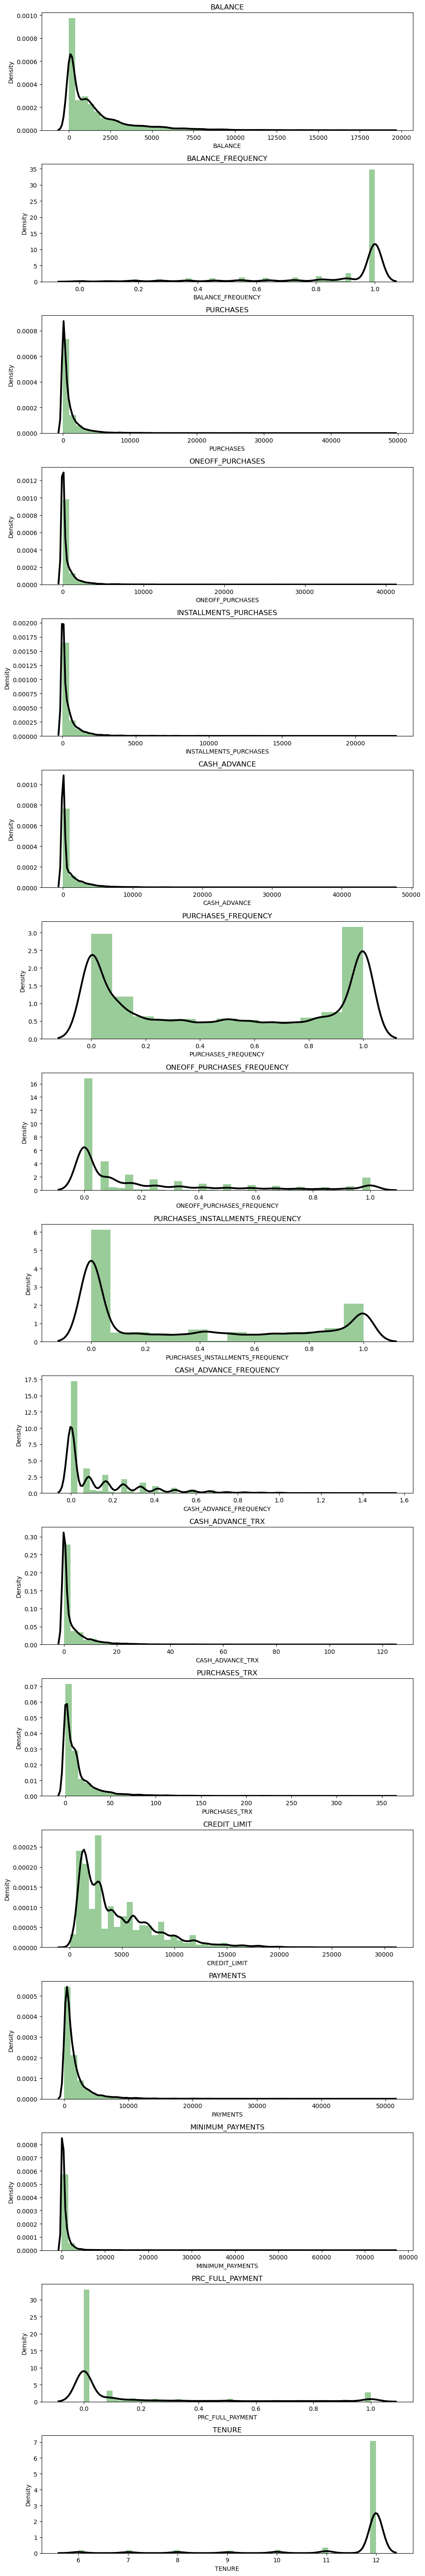

In [108]:
plt.figure(figsize = (10, 60))
for i in range (0, 17):
    plt.subplot(17, 1, i+1)
    sns.distplot (df[df.columns [i]], kde_kws = {"color" : "black", "bw" : 0.1, "lw": 3, "label" : "KDE"}, hist_kws = {"color" : "g"})
    plt.title (df.columns[i])
plt.tight_layout()

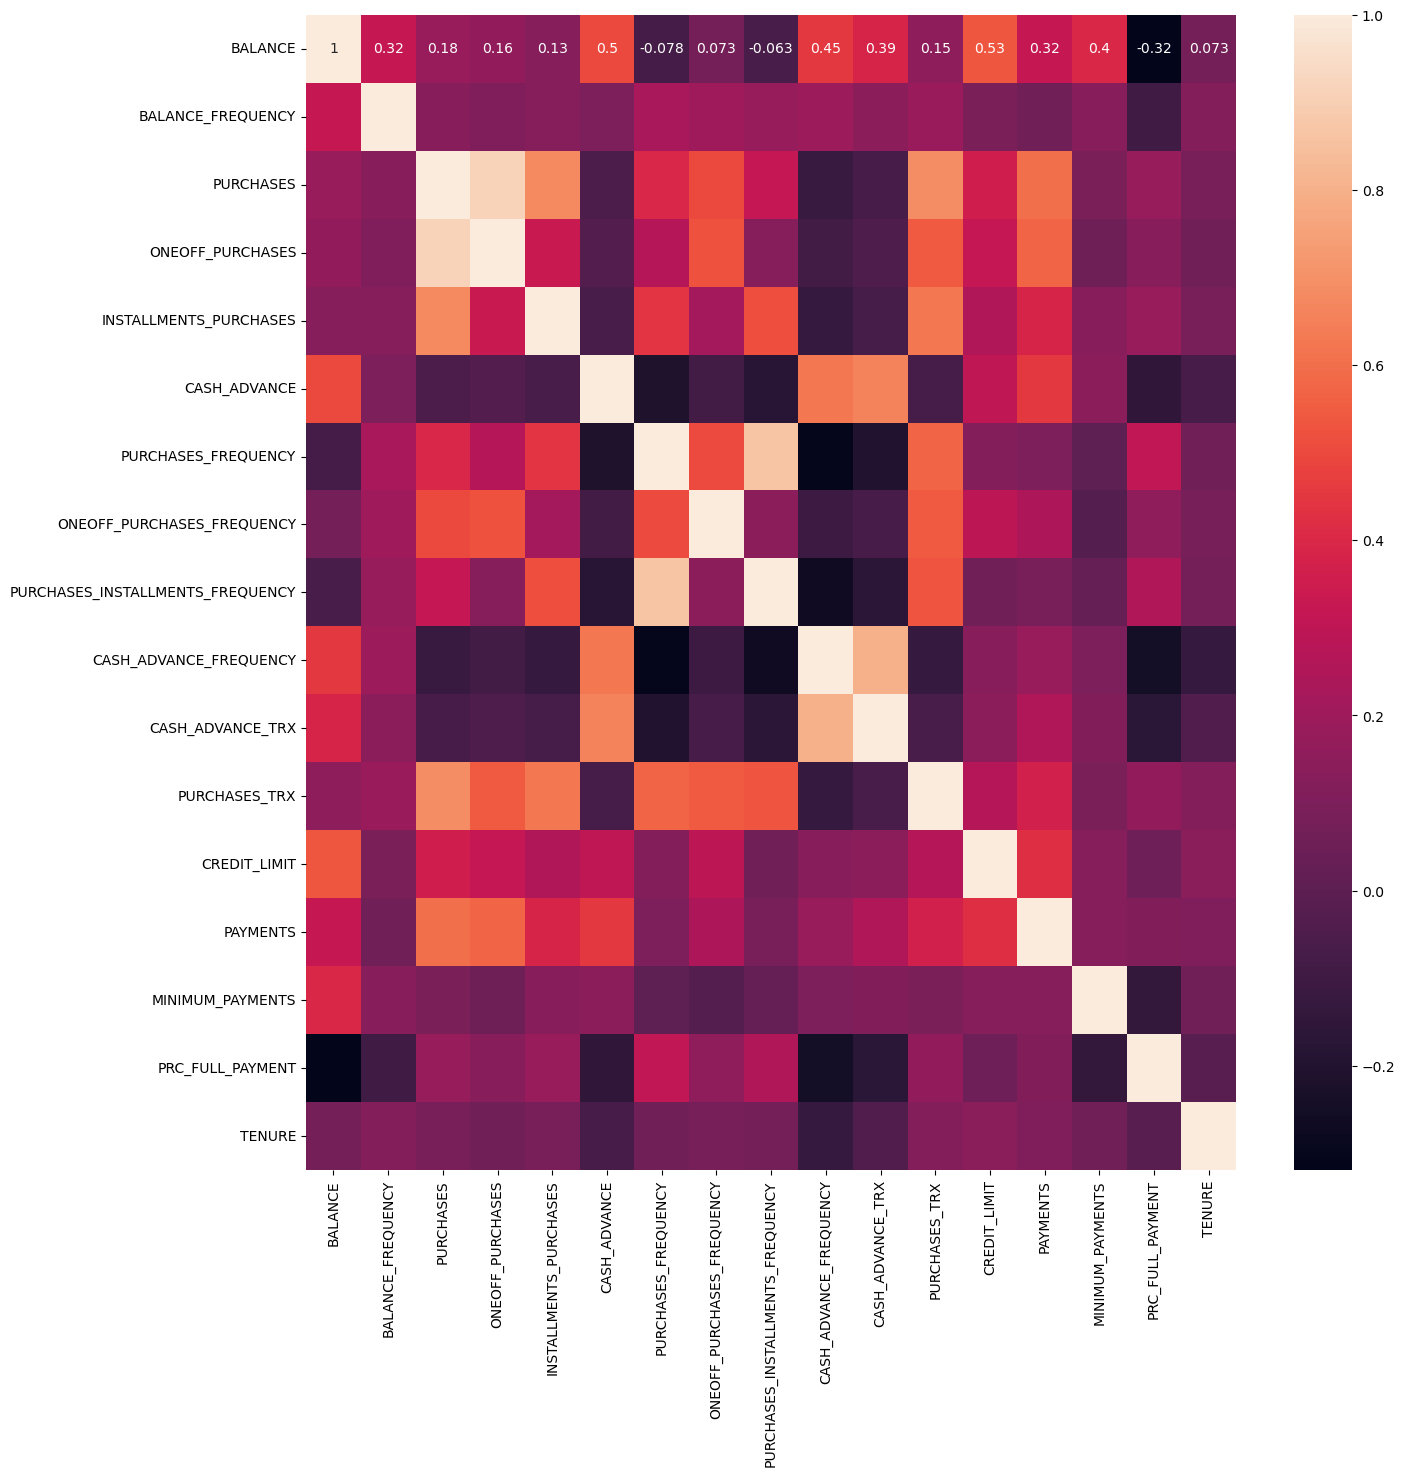

In [109]:
plt.figure (figsize = (15, 15))
sns.heatmap (df.corr(), annot=True)
plt.show()

##### Impor Beberapa Libs yang penting

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

##### Menskalakan DataFrame

In [113]:
scalar = StandardScaler()

In [114]:
scaled_df = scalar.fit_transform(df)

##### Pengurangan dimensi¶
Mengubah DataFrame menjadi DataFrame 2D untuk visualisasi

In [116]:
#pca = PCA(n_components=2)
#principal_components = pca.fit_transform(scaled_df)
#pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
#pca_df

#from sklearn.impute import SimpleImputer
#import pandas as pd

# Assume that 'scaled_df' is your dataset
#X_train = scaled_df  # Replace with your actual training data

# Create an imputer object with mean imputation strategy
#imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
#imputer.fit(X_train)

# Transform the training data using the imputer
#X_train_imputed = imputer.transform(X_train)

# Apply PCA on the imputed data
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#principal_components = pca.fit_transform(X_train_imputed)
#pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2"])
#pca_df

from sklearn.impute import SimpleImputer
import pandas as pd

# Assume that 'scaled_df' is your dataset

# Create an imputer object with mean imputation strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the dataset
imputer.fit(scaled_df)

# Transform the dataset using the imputer
X_imputed = imputer.transform(scaled_df)

# Apply PCA on the imputed data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_imputed)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2"])
pca_df

PCA1      PCA2
0    -1.680571 -1.077569
1    -1.140969  2.506329
2     0.970397 -0.381529
3    -0.873772  0.041896
4    -1.598297 -0.689773
...        ...       ...
8945 -0.356713 -2.015032
8946 -0.562863 -1.641362
8947 -0.923587 -1.810521
8948 -2.334982 -0.658101
8949 -0.554844 -0.397272

[8950 rows x 2 columns]

##### Penyetelan hiperparameter¶
Mencari nilai 'k' dengan Metode Elbow Method

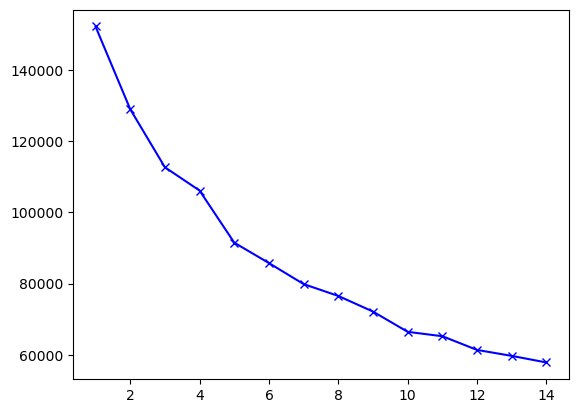

In [129]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with an imputer and KMeans
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler()),  # Scale the data
    ('kmeans', KMeans(n_clusters=5))  # KMeans with 5 clusters
])

# Create a list of range values for the elbow method
range_val = list(range(1, 15))

# Initialize an empty list to store inertia values
inertia = []

# Iterate over the range of values
for i in range_val:
    # Set the number of clusters for KMeans
    pipeline.named_steps['kmeans'].set_params(n_clusters=i)

    # Fit the pipeline to the data
    pipeline.fit(pd.DataFrame(scaled_df))

    # Append the inertia value to the list
    inertia.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the inertia values
plt.plot(range_val, inertia, 'bx-')

##### Pembuatan Model menggunakan KMeans

In [138]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Create a pipeline with imputer, scaler, and kmeans
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # impute missing values with mean
    ('scaler', RobustScaler()),  # robust scaler
    ('kmeans', KMeans(n_clusters=8))  # kmeans clustering
])

# Fit the pipeline to the data
pipeline.fit(scaled_df)

# Predict the clusters
kmeans_model = pipeline.named_steps['kmeans']
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the dataframe
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': cluster_labels})], axis=1)

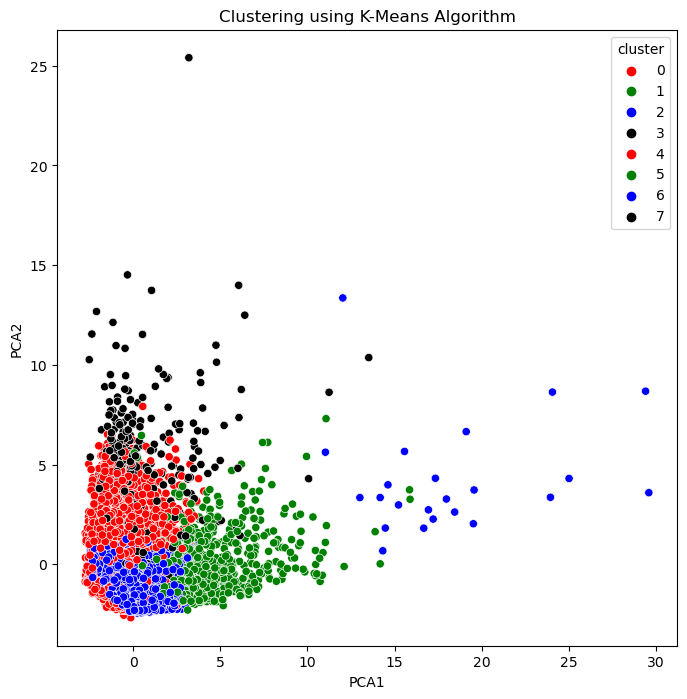

In [140]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

##### find all cluster centers

In [143]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])

##### inverse transform the data¶

In [146]:
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  4467.647515          0.807441   1024.474447      1095.147635   
1  3236.025595          0.832789  10375.487921     10049.943827   
2  1664.192019          0.812098   1646.686517      1461.738401   
3  4657.789266          0.850745   2385.338470      1153.374281   
4   754.861662         -0.428978    980.026672      1019.091068   
5  7833.710355          0.877271   3703.985627       483.203442   
6  6508.813279          0.783732  55998.577211     64742.403291   
7  5887.617583          0.742491   2379.002422      2351.143435   

  INSTALLMENTS_PURCHASES  CASH_ADVANCE PURCHASES_FREQUENCY  \
0             546.363871   6362.944497            0.378249   
1            3577.605494   1774.885780            0.697282   
2             902.251641   1432.908727            0.520278   
3            1822.880192   3217.723928            0.488615   
4             555.253246   1609.846974            0.393928   
5            3547.645894   2877.711496            0.524752   
6           10972.288631   2805.346569            0.685441   
7            1012.948618  19005.440268            0.424605   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.233249                         0.370738   
1                   0.825747                         0.655524   
2                   0.315018                         0.498377   
3                   0.183625                         0.517474   
4                   0.191505                         0.393702   
5                   0.119592                         0.578921   
6                   0.964830                         0.651659   
7                   0.304707                         0.420403   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.489318        19.606041     13.742566   6599.400813   
1               0.188882         5.571371    105.690621   8161.610398   
2               0.194002         5.046435     23.010701   4884.613280   
3               0.243685         9.407310     31.533277   5196.725191   
4               0.173308         4.754605     11.477552   4985.916305   
5               0.188745         7.148407     56.876703   7061.633717   
6               0.171034         6.290076    203.023022  14180.196774   
7               0.672578        49.041398     26.843193   9028.149091   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   3924.027009      4473.301606         0.202337  10.849664  
1   8863.059925      3184.431403         0.804564  11.398271  
2   1901.964151      1310.161015         0.466109  11.096560  
3   3513.497036     51694.394891         0.159957  11.395367  
4   2059.974780       609.244332         0.642719  10.816470  
5   4236.861834    179757.875314         0.153715  11.517318  
6  53046.546821     11163.298915         1.208764  11.430362  
7  19925.240139      5932.656270         0.388278  11.137831

#### Creating a target column "Cluster" for storing the cluster segment¶


In [149]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        2  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        2  
3        0.000000               NaN          0.000000      12        4  
4      678.334763        244.791237          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

In [151]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     3202.467416           0.909091       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
16    2072.074354           0.875000       0.00              0.00   
24    5368.571219           1.000000       0.00              0.00   
28    7152.864372           1.000000     387.05            204.55   
...           ...                ...        ...               ...   
8881  2150.940844           1.000000    1105.74              0.00   
8912   376.547421           0.857143     520.00            280.00   
8915   381.341657           1.000000      78.00              0.00   
8917  1880.817982           1.000000       0.00              0.00   
8941  5967.475270           0.833333     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00   6442.945483             0.000000   
15                   1611.70   2301.491267             0.500000   
16                      0.00   2784.274703             0.000000   
24                      0.00    798.949863             0.000000   
28                    182.50   2236.145259             0.666667   
...                      ...           ...                  ...   
8881                 1105.74   2220.336732             1.000000   
8912                  240.00   1178.402416             0.857143   
8915                   78.00    934.808869             1.000000   
8917                    0.00   2335.949930             0.000000   
8941                  214.55   8555.409326             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.000000                          0.000000   
15                      0.000000                          0.500000   
16                      0.000000                          0.000000   
24                      0.000000                          0.000000   
28                      0.166667                          0.416667   
...                          ...                               ...   
8881                    0.000000                          0.857143   
8912                    0.142857                          0.714286   
8915                    0.000000                          0.833333   
8917                    0.000000                          0.000000   
8941                    0.000000                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.250000                 4              0        7000.0   
15                  0.166667                 4             11        8000.0   
16                  0.250000                 3              0        3000.0   
24                  0.363636                 4              0        6000.0   
28                  0.833333                16              8       10500.0   
...                      ...               ...            ...           ...   
8881                0.142857                 7             13        2500.0   
8912                0.714286                 9              7        1000.0   
8915                0.666667                16              6        1000.0   
8917                0.333333                 5              0        2500.0   
8941                0.666667                13              5        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
1     4103.032597       1072.340217          0.222222      12        0  
15    1993.439277       2109.906490          0.000000      12        0  
16     391.974562        376.579631          0.000000       8        0  
24    1422.726707       1657.002877          0.000000      11        0  
28    1601.448347       1648.851345          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8881   631.429223       2825.419309          0.000000       7        0  
89

In [153]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6      627.260806           1.000000    7091.01           6402.63   
21    6369.531318           1.000000    6359.95           5910.04   
48     229.867179           1.000000    2390.60           1402.93   
57    2386.330629           1.000000    5217.62           4789.09   
84    1935.362486           1.000000    4915.60           4515.34   
...           ...                ...        ...               ...   
8662   599.909949           1.000000    4947.32           3149.59   
8689   368.318662           0.909091    8053.95           8053.95   
8707    78.448912           1.000000    1875.18            977.85   
8737  2533.618119           0.909091    5633.83           2985.92   
8748  1042.816735           0.625000    3950.00           3950.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                     688.38      0.000000             1.000000   
21                    449.91    229.028245             1.000000   
48                    987.67      0.000000             1.000000   
57                    428.53      0.000000             0.916667   
84                    400.26    293.844792             1.000000   
...                      ...           ...                  ...   
8662                 1797.73      0.000000             1.000000   
8689                    0.00      0.000000             0.833333   
8707                  897.33      0.000000             1.000000   
8737                 2647.91   2451.807788             0.916667   
8748                    0.00      0.000000             0.250000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                       1.000000                          1.000000   
21                      0.916667                          1.000000   
48                      0.666667                          1.000000   
57                      0.916667                          0.500000   
84                      1.000000                          0.333333   
...                          ...                               ...   
8662                    1.000000                          0.916667   
8689                    0.833333                          0.000000   
8707                    0.833333                          0.916667   
8737                    0.500000                          0.750000   
8748                    0.250000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                   0.000000                 0             64       13500.0   
21                  0.333333                 6             92       11250.0   
48                  0.000000                 0             87        3300.0   
57                  0.000000                 0             42        7500.0   
84                  0.083333                 1             50        9000.0   
...                      ...               ...            ...           ...   
8662                0.000000                 0             73        3000.0   
8689                0.000000                 0             46        2000.0   
8707                0.000000                 0             78        1200.0   
8737                0.333333                16             82        9000.0   
8748                0.000000                 0              3        3150.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
6     6354.314328        198.065894          1.000000      12        1  
21    2077.959051       1659.775075          0.000000      12        1  
48    2543.953559        175.657825          0.916667      12        1  
57    5678.729613       1311.514878          0.083333      12        1  
84    4921.066897        594.756686          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8662  5024.430008        218.172915          0.083333      12        1  
86

In [155]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
7     1823.652743           1.000000     436.20              0.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
7                     436.20      0.000000             1.000000   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
7                       0.000000                          1.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
7                   0.000000                 0             12        2300.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787              0.00      12        2  
2      622.066742        627.284787              0.00      12        2  
4      678.334763        244.791237              0.00      12        2  
5     1400.057770       2407.246035              0.00      12        2  
7      679.065082        532.033990              0.00      12        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365              0.50       6        2  
89

In [157]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
19    3577.970933           1.000000     398.64              0.00   
20    2016.684686           1.000000     176.68              0.00   
34    3517.101616           0.727273     547.28              0.00   
78    1205.716678           1.000000       0.00              0.00   
90    9381.255094           1.000000    5100.07           1147.83   
...           ...                ...        ...               ...   
8274  1410.909779           1.000000     698.88              0.00   
8470  2046.727519           0.818182    1369.72            422.44   
8614  1182.080141           1.000000     266.68              0.00   
8688  2898.484109           1.000000       0.00              0.00   
8724  3002.791004           1.000000    2463.00           2463.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
19                    398.64      0.000000             1.000000   
20                    176.68      0.000000             0.666667   
34                    547.28      0.000000             1.000000   
78                      0.00     38.325801             0.000000   
90                   3952.24    370.737197             1.000000   
...                      ...           ...                  ...   
8274                  698.88    948.848018             1.000000   
8470                  947.28   1817.810563             0.750000   
8614                  266.68    848.848179             0.666667   
8688                    0.00   3021.097135             0.000000   
8724                    0.00    797.158950             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
19                      0.000000                          1.000000   
20                      0.000000                          0.666667   
34                      0.000000                          1.000000   
78                      0.000000                          0.000000   
90                      0.250000                          0.916667   
...                          ...                               ...   
8274                    0.000000                          1.000000   
8470                    0.166667                          0.666667   
8614                    0.000000                          0.666667   
8688                    0.000000                          0.000000   
8724                    0.166667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
19                  0.000000                 0             12        4000.0   
20                  0.000000                 0              8        2000.0   
34                  0.000000                 0             14       11000.0   
78                  0.083333                 1              0        1200.0   
90                  0.083333                 1             46        9000.0   
...                      ...               ...            ...           ...   
8274                0.166667                 8             12        1200.0   
8470                0.166667                 4             17        2500.0   
8614                0.083333                 6              8        1000.0   
8688                0.272727                 5              0        3000.0   
8724                0.166667                 3              3        3000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
19    1053.980464      12465.549380          0.000000      12        3  
20     223.068600      13557.297260          0.000000      12        3  
34    8735.607835      17862.558310          0.000000      12        3  
78      29.278671       8242.687678          0.000000      12        3  
90    6409.496345       9827.045323          0.000000      12        3  
...           ...               ...               ...     ...      ...  
8274    79.578186      11795.280960          0.083333      12        3  
84

<Axes: xlabel='Cluster', ylabel='count'>

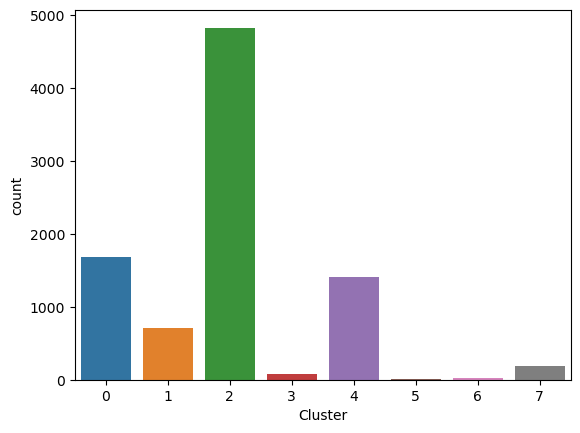

In [159]:
sns.countplot(x='Cluster', data=cluster_df)

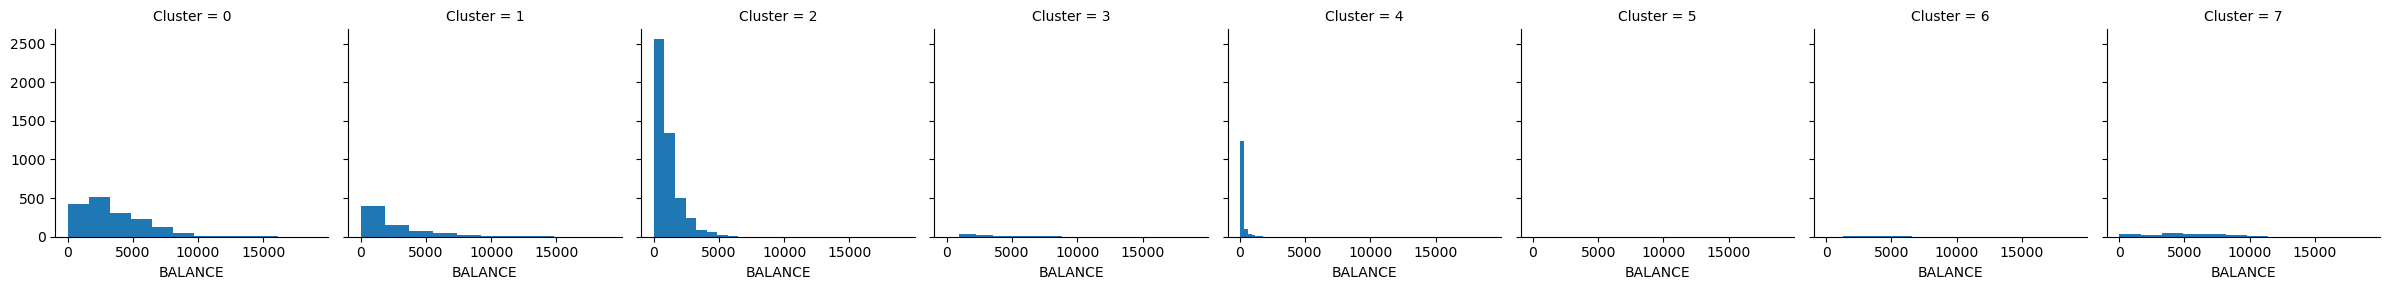

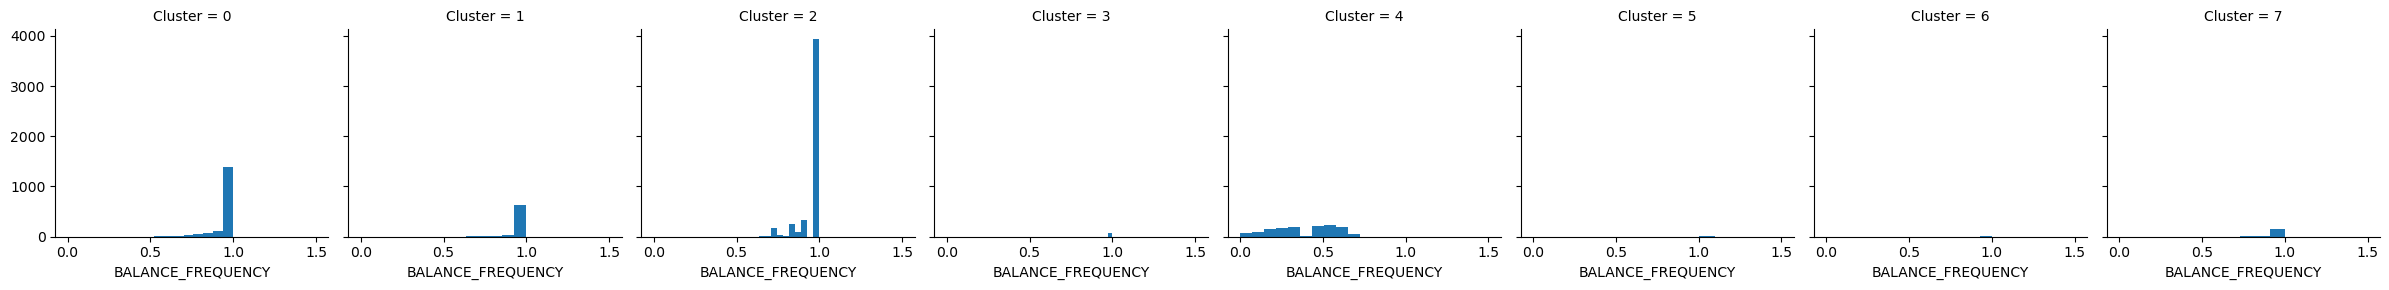

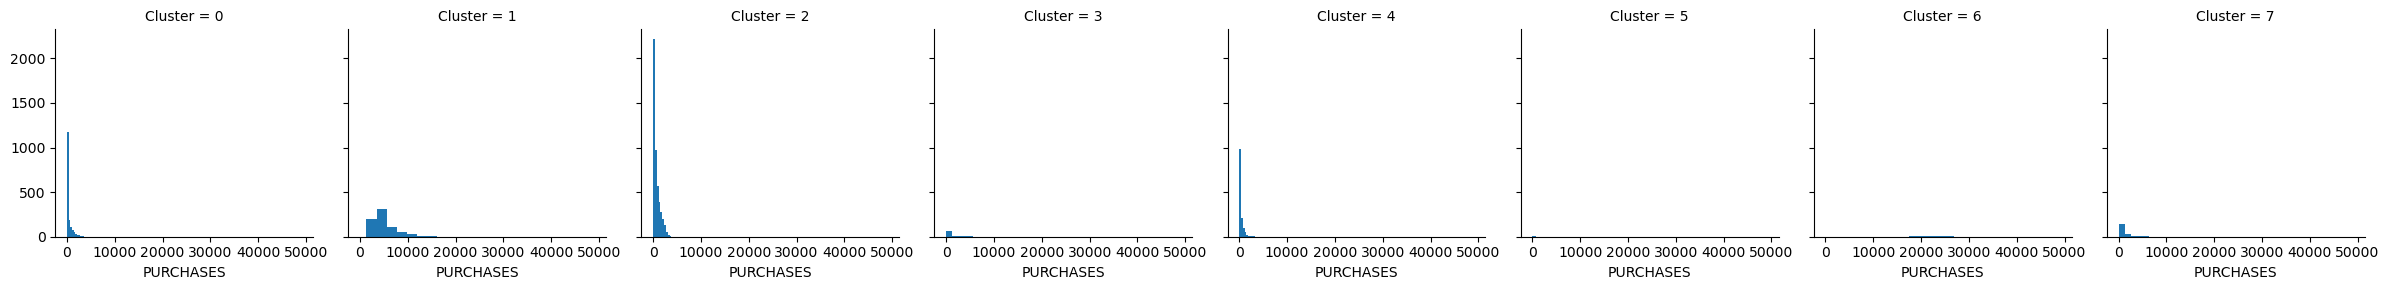

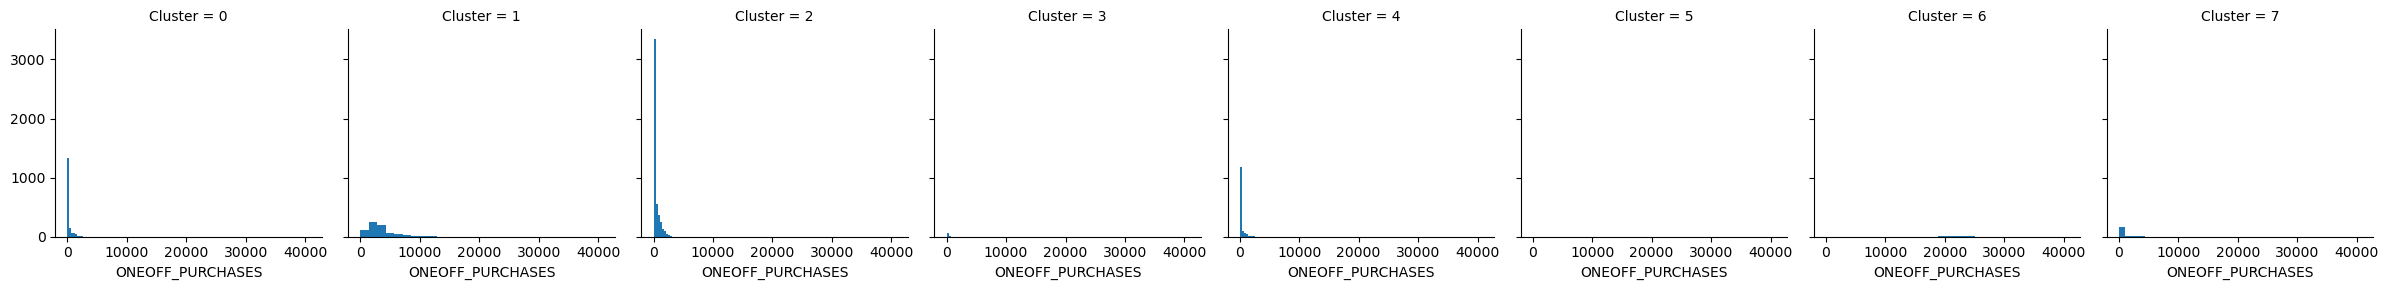

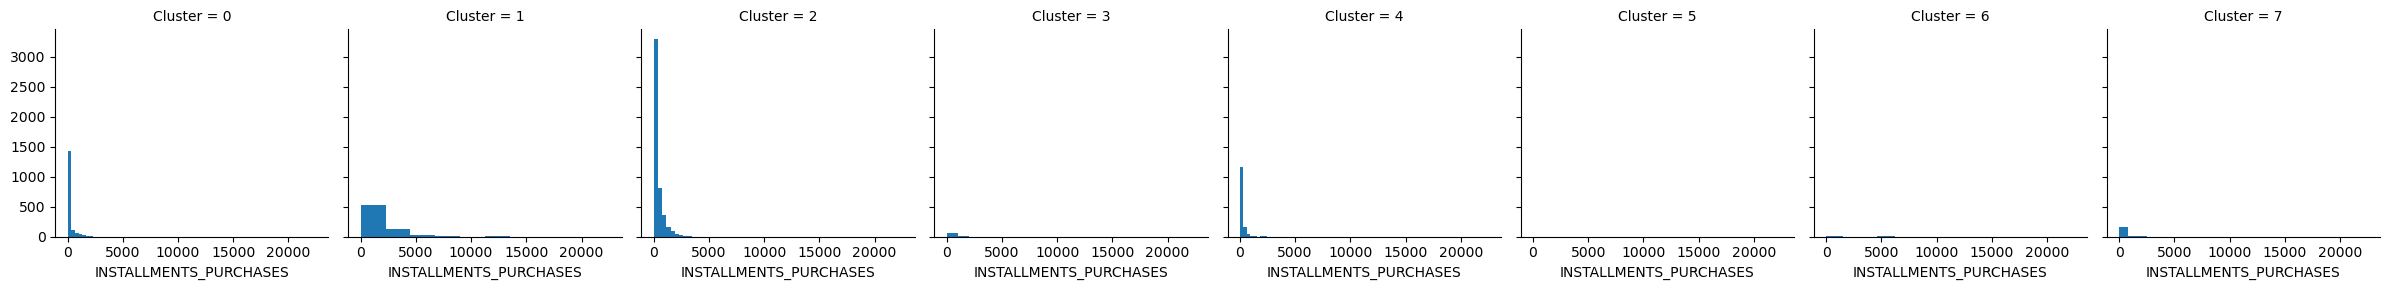

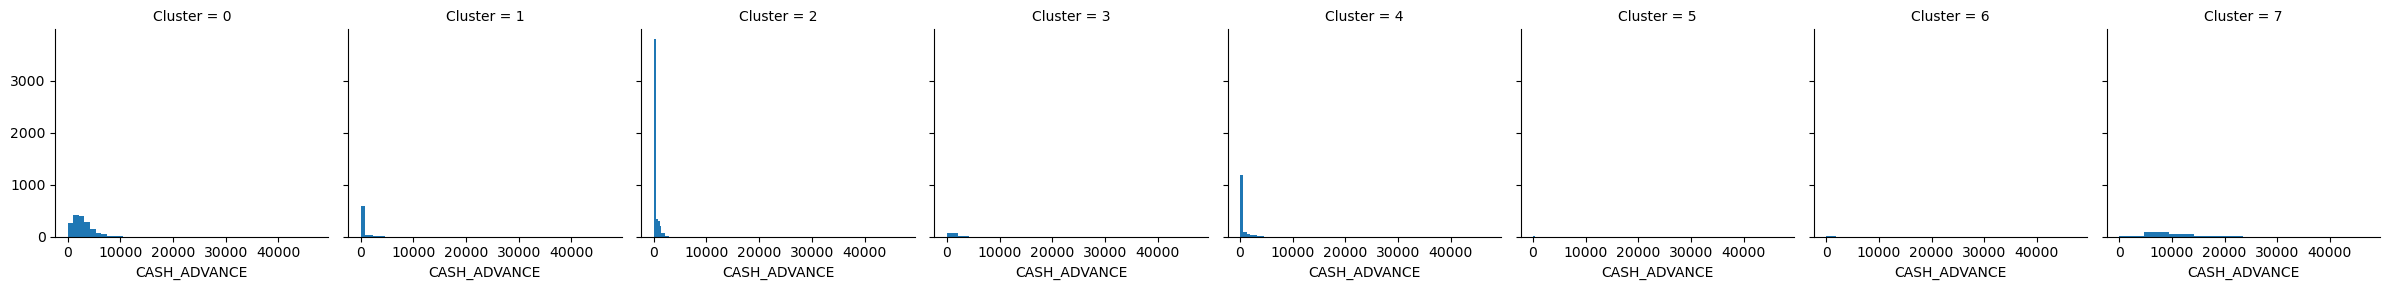

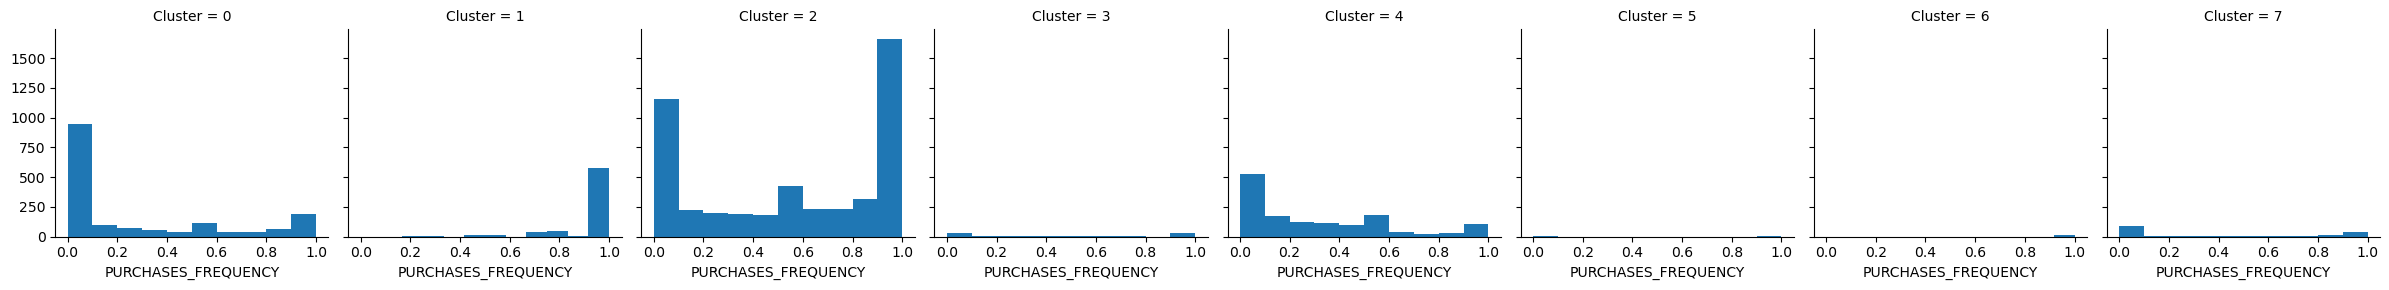

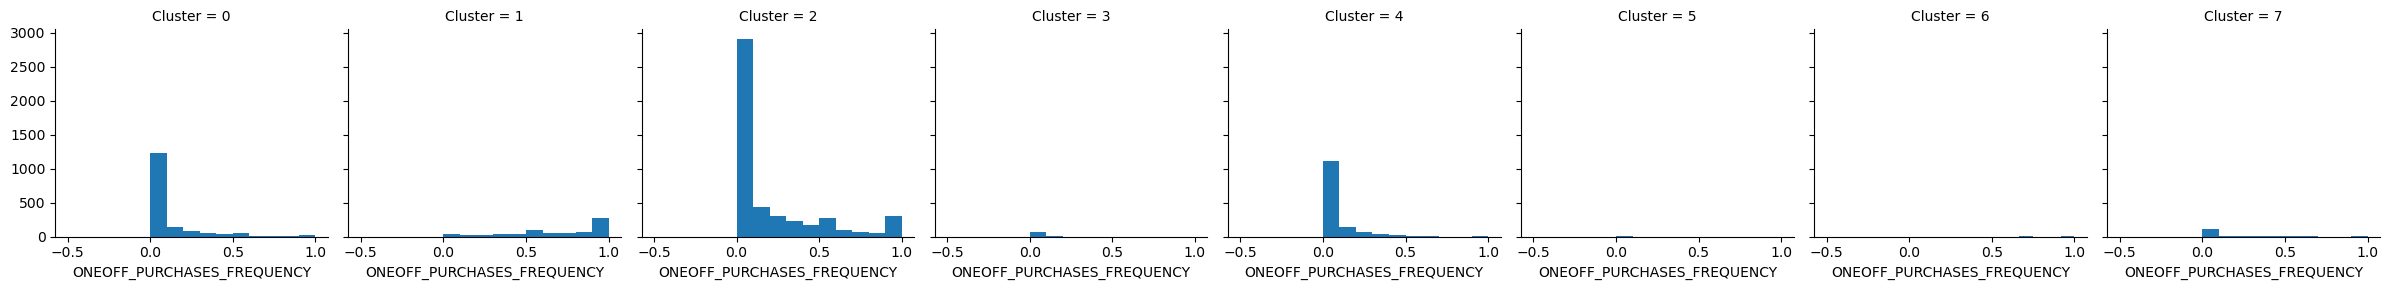

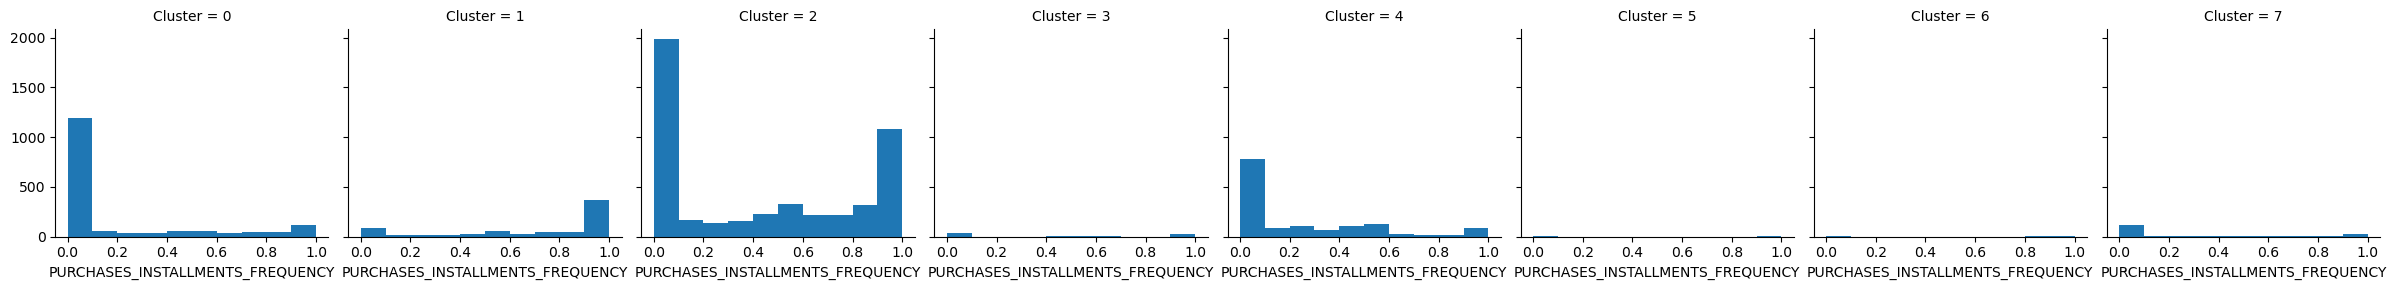

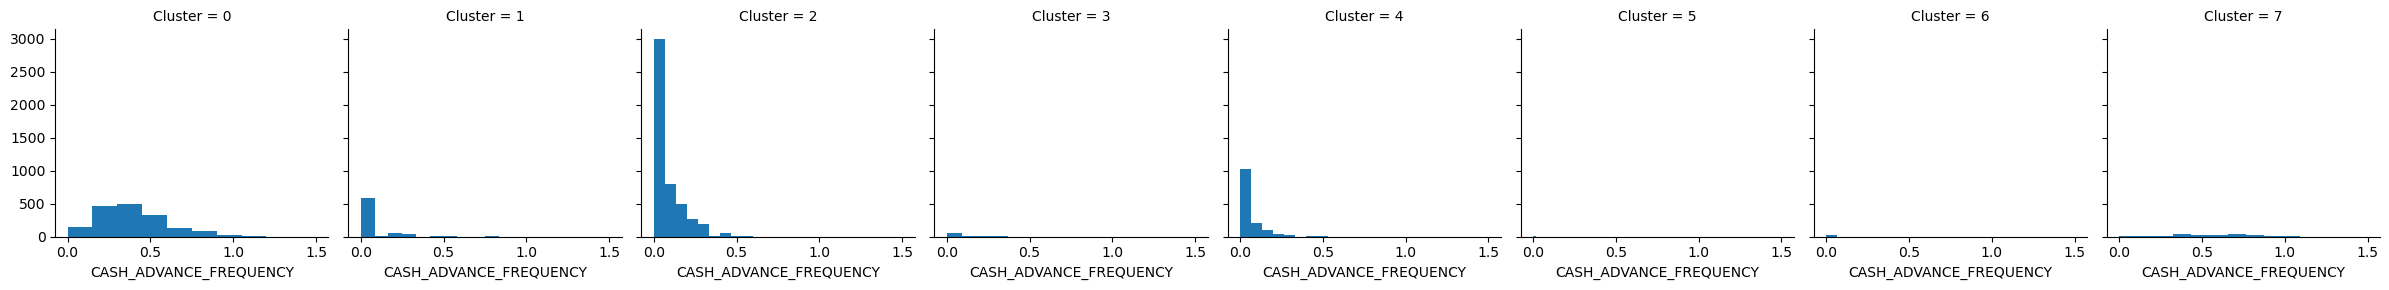

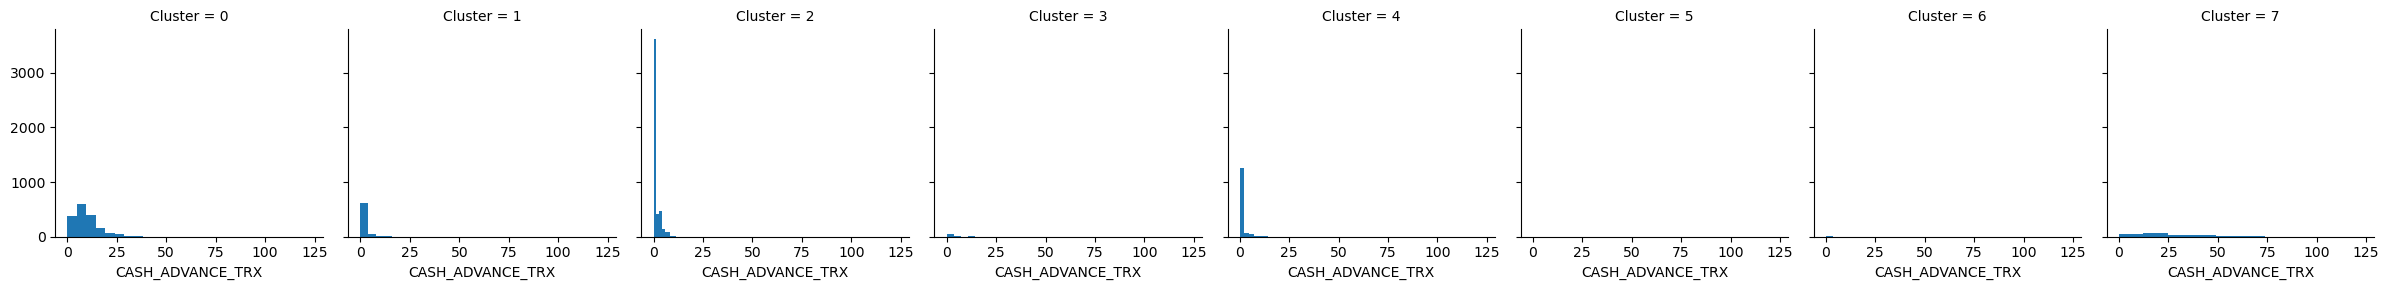

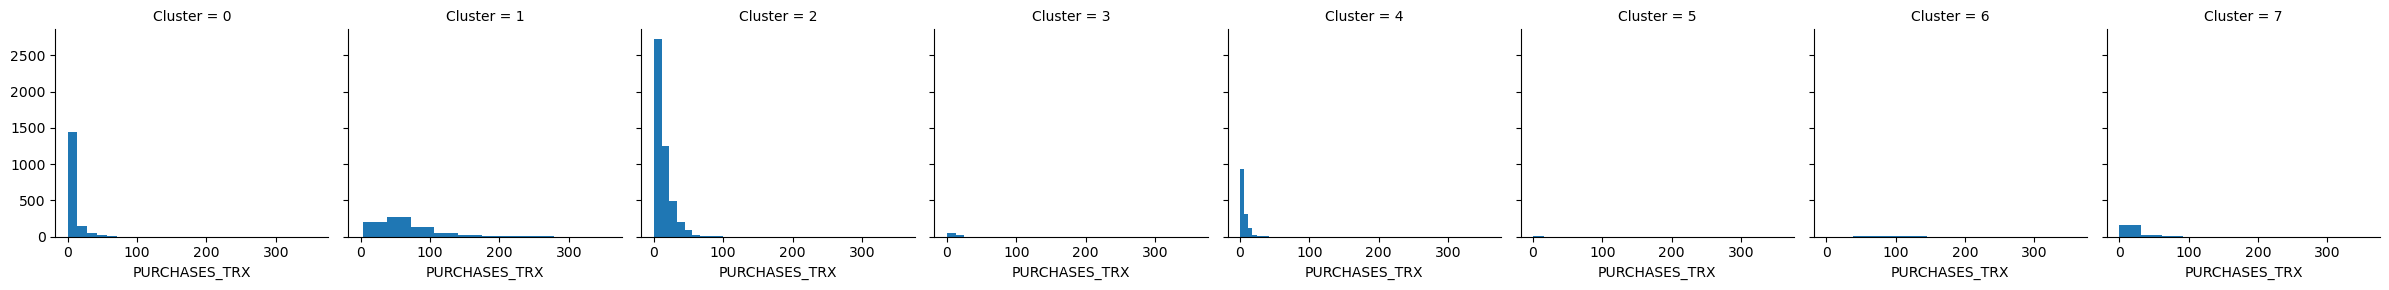

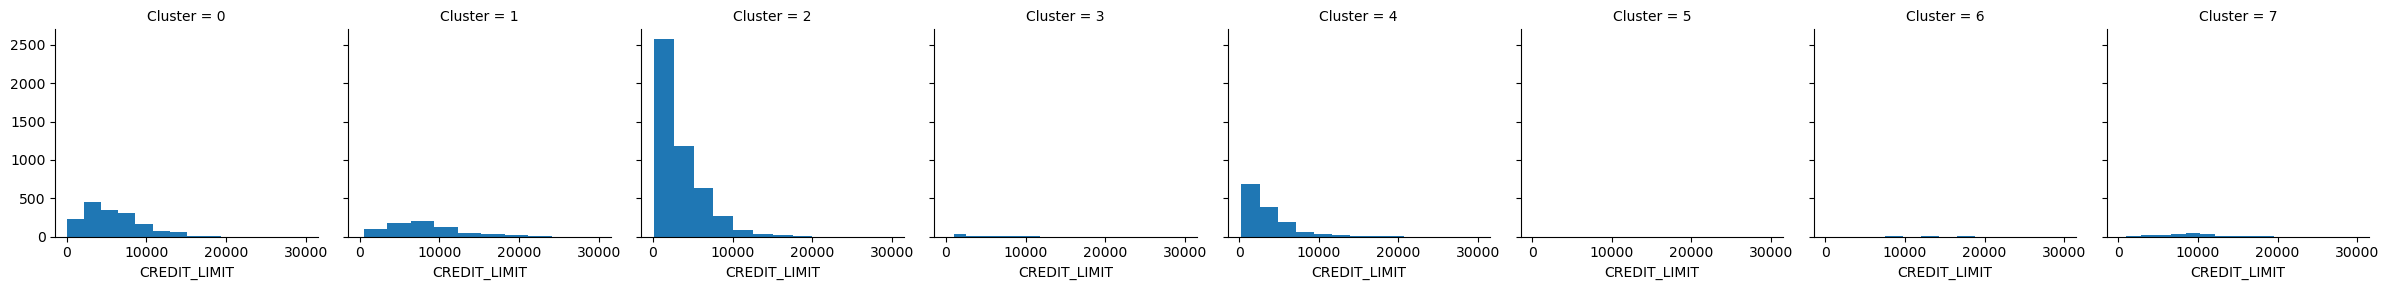

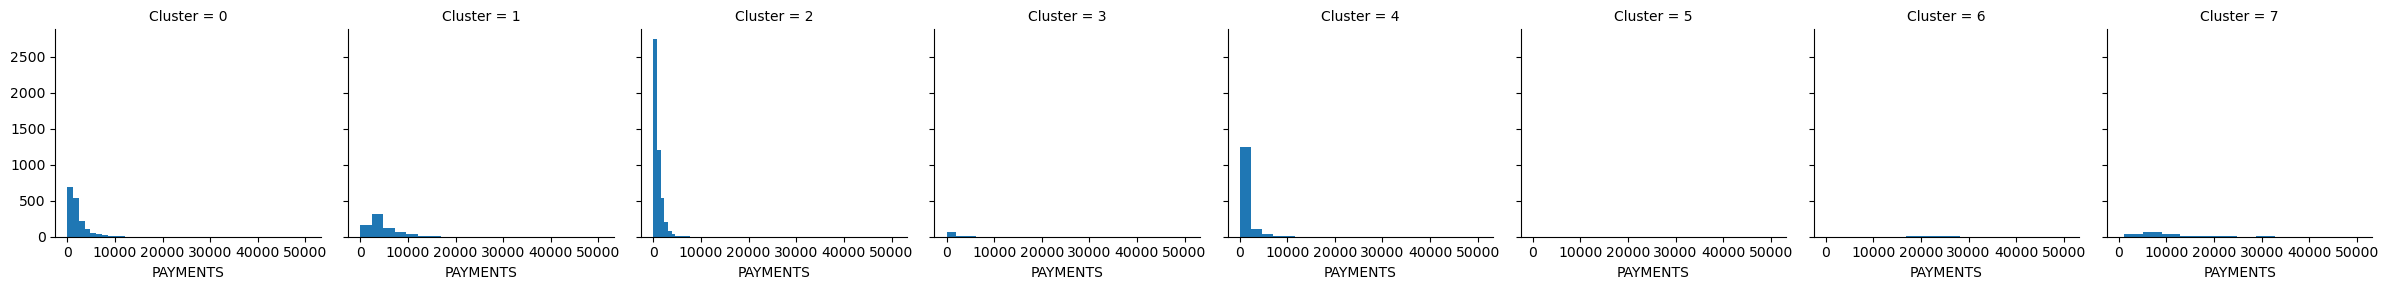

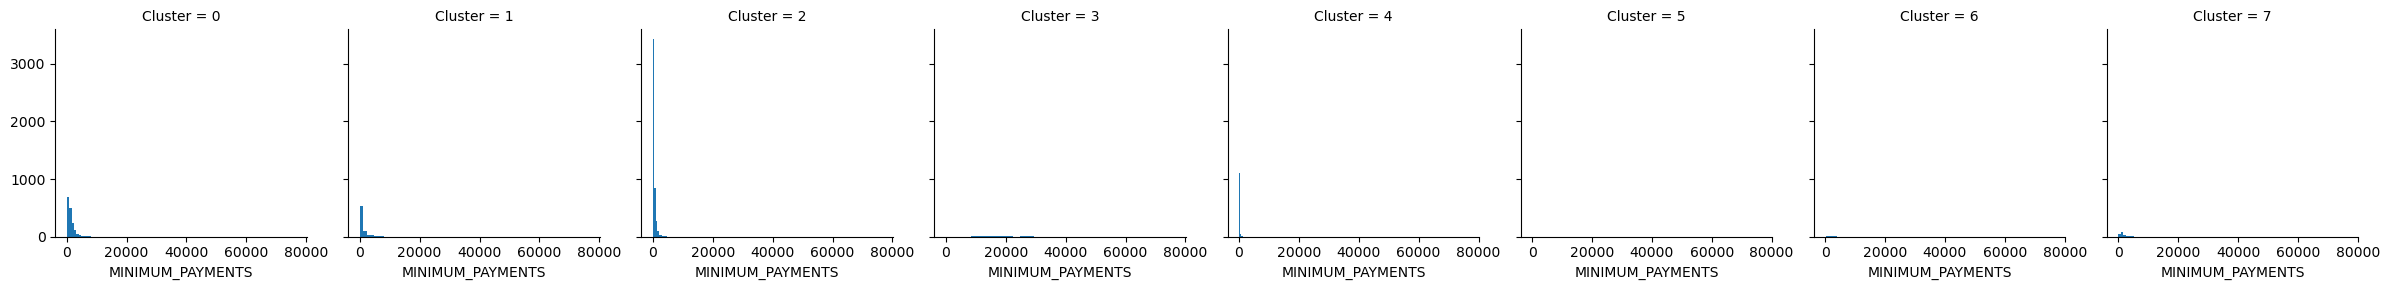

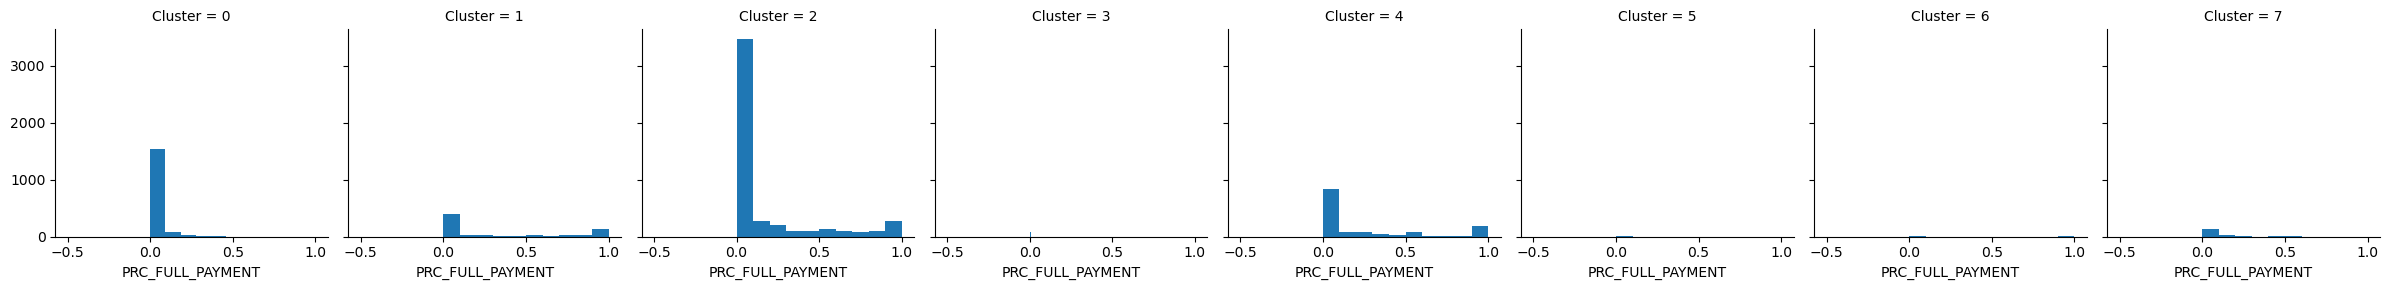

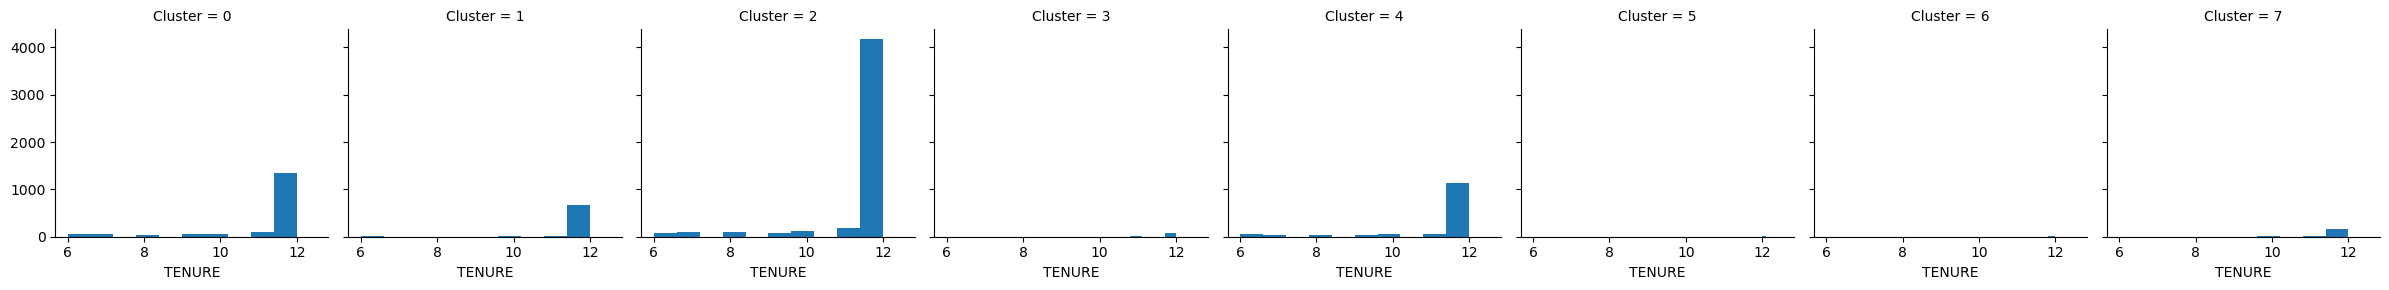

In [161]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

##### Saving the kmeans clustering model and the data with cluster label

In [164]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [166]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

##### Training and Testing the model accuracy using decision tree

In [169]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=3)

In [171]:
X_train

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5734  1079.097023                1.0     247.44              0.00   
6631  2590.469749                1.0     459.12            422.00   
8659   945.802599                1.0     540.00              0.00   
8503  3074.490820                1.0       0.00              0.00   
7433  1325.679991                1.0    1084.87            687.57   
...           ...                ...        ...               ...   
7161  1653.400854                1.0     100.00            100.00   
2707   276.446975                1.0    1429.39            100.00   
6400  1434.793889                1.0     467.88            467.88   
1688  4530.639094                1.0       0.00              0.00   
5994   788.425212                1.0      94.38             32.08   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5734                  247.44      0.000000             1.000000   
6631                   37.12      0.000000             0.333333   
8659                  540.00    912.094948             1.000000   
8503                    0.00   3382.232089             0.000000   
7433                  397.30   3330.913556             0.833333   
...                      ...           ...                  ...   
7161                    0.00   2031.677435             0.090909   
2707                 1329.39      0.000000             1.000000   
6400                    0.00      0.000000             1.000000   
1688                    0.00   3162.719581             0.000000   
5994                   62.30   1461.675329             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5734                    0.000000                          1.000000   
6631                    0.333333                          0.083333   
8659                    0.000000                          0.875000   
8503                    0.000000                          0.000000   
7433                    0.333333                          0.833333   
...                          ...                               ...   
7161                    0.090909                          0.000000   
2707                    0.083333                          1.000000   
6400                    1.000000                          0.000000   
1688                    0.000000                          0.000000   
5994                    0.083333                          0.166667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5734                0.000000                 0             12        1200.0   
6631                0.000000                 0             11        2900.0   
8659                0.125000                 4             15        1000.0   
8503                0.166667                 2              0        4000.0   
7433                0.416667                 9             16        3000.0   
...                      ...               ...            ...           ...   
7161                0.363636                13              1        2000.0   
2707                0.000000                 0             21        2800.0   
6400                0.000000                 0             12        4300.0   
1688                0.250000                 5              0        8000.0   
5994                0.500000                10              3        2500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5734   503.445403        302.481716          0.000000      12  
6631   584.707120       1369.991379          0.000000      12  
8659   365.497356       1236.864840          0.000000       8  
8503  3249.404994        695.004032          0.000000      12  
7433  4135.414563        405.944341          0.090909      12  
...           ...               ...               ...     ...  
7161   575.557594        432.921030          0.000000      11  
2707  1296.041874        193.607553          0.100000      12  
6400  2538

In [173]:
X_test

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5535    76.673877           0.777778     410.90              0.00   
7828   645.406005           1.000000       0.00              0.00   
1680  4977.237859           1.000000      61.99             61.99   
4518   380.517893           1.000000    2590.27           2102.46   
6131    41.011184           1.000000    1314.75            125.19   
...           ...                ...        ...               ...   
265   8097.334733           1.000000    3999.92            200.00   
5034    13.221335           0.857143     108.84              0.00   
1278  1770.072581           1.000000       0.00              0.00   
285   4246.430225           1.000000       0.00              0.00   
1120  4688.103434           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5535                  410.90      0.000000             0.666667   
7828                    0.00    929.220085             0.000000   
1680                    0.00   7448.329320             0.083333   
4518                  487.81      0.000000             0.916667   
6131                 1189.56      0.000000             1.000000   
...                      ...           ...                  ...   
265                  3799.92      0.000000             1.000000   
5034                  108.84      0.000000             0.857143   
1278                    0.00    781.616559             0.000000   
285                     0.00   9270.408108             0.000000   
1120                    0.00    357.129377             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5535                    0.000000                          0.555556   
7828                    0.000000                          0.000000   
1680                    0.083333                          0.000000   
4518                    0.916667                          0.416667   
6131                    0.500000                          1.000000   
...                          ...                               ...   
265                     0.083333                          1.000000   
5034                    0.000000                          0.714286   
1278                    0.000000                          0.000000   
285                     0.000000                          0.000000   
1120                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5535                0.000000                 0              6        1500.0   
7828                0.333333                 4              0        1000.0   
1680                0.500000                22              1        6500.0   
4518                0.000000                 0             49        2500.0   
6131                0.000000                 0             70        6000.0   
...                      ...               ...            ...           ...   
265                 0.000000                 0             14        7500.0   
5034                0.000000                 0              9        1500.0   
1278                0.083333                 1              0        2500.0   
285                 0.666667                16              0        7000.0   
1120                0.166667                 2              0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5535   449.090030        100.105897          0.000000       9  
7828   193.013564        310.454708          0.000000      12  
1680  6850.235626       1587.042735          0.000000      12  
4518  1825.405687        173.164117          0.090909      12  
6131  1303.104693        135.761304          0.700000      12  
...           ...               ...               ...     ...  
265   5624.074339       9952.672511          0.000000      12  
5034    69.973565         85.417572          0.000000       7  
1278  1390

##### Decision Tree Classifier

In [180]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
model = DecisionTreeClassifier(criterion="entropy")

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

In [182]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 487    2   21    2    0    0    0    6]
 [   1  184   10    0    0    1    0    0]
 [  30   15 1425    0    3    0    0    0]
 [   2    1    2   18    0    1    0    1]
 [   5    2    1    0  399    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    8    0]
 [  10    5    0    0    3    0    1   37]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       518
           1       0.88      0.94      0.91       196
           2       0.98      0.97      0.97      1473
           3       0.90      0.72      0.80        25
           4       0.99      0.98      0.98       407
           5       0.00      0.00      0.00         1
           6       0.89      0.89      0.89         9
           7       0.84      0.66      0.74        56

    accuracy                           0.95      2685
   macro avg       0.80      0.76      0.78      2685
weighted avg       0.95      0.95      0.95      2685



##### Score Accuracy : 95%

#### REVISI

ini sebagai masukan yg bisa dijadiin revisi pengerjaan, Mungkin bisa juga ya dicoba make model lain selain DecisionTreeClassifier misal randomforest classifier untuk dibandingkan performanya, selain itu inovatif banget buat kombinasiin antara kmeans dengan supervised learning. Good ! 2. Bisa disimpulkan mana model terbaik yg dikombinasikan dengan k-means, serta pilih confusion matrix yg tepat beserta alasannya

In [45]:
# Dummy data 
cluster_df= pd.DataFrame({
    'Feature1': np.random.rand(500),
    'Feature2': np.random.rand(500),
    'Feature3': np.random.rand(500),
    'Cluster': np.random.randint(0, 2, size=500)  # Target untuk klasifikasi
})

# Pisahkan fitur dan target
X = cluster_df.drop(['Cluster'], axis=1)
y = cluster_df['Cluster']

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy')

# Latih model dengan data training
rf_model.fit(X_train, y_train)

# Prediksi menggunakan model pada data testing
y_pred = rf_model.predict(X_test)

# Evaluasi performa model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Confusion Matrix:
 [[20 21]
 [26 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.49      0.46        41
           1       0.61      0.56      0.58        59

    accuracy                           0.53       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.54      0.53      0.53       100



#### Score Accuracy : 53%

#### Insight

* Kombinasi antara algoritma k-Means dan model klasifikasi seperti RandomForest mungkin tidak selalu cocok, karena k-Means adalah algoritma clustering yang tidak memiliki label target yang digunakan dalam pembelajaran supervisi seperti yang dilakukan oleh RandomForest.
diliat dari score accuracy : model dan confusion matrix menggunakan decission tree classifier accuracynya lebih tinggi dianggap daripada menggunakan random forest

* Confusion matrix yang paling tepat untuk digunakan dalam kasus ini adalah confusion matrix yang dievaluasi terhadap hasil klasifikasi setelah penggabungan k-Means dengan Decission Tree. Hal ini karena confusion matrix akan memberikan gambaran accuracy yang komprehensif tentang performa model klasifikasi.